/home/saket/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


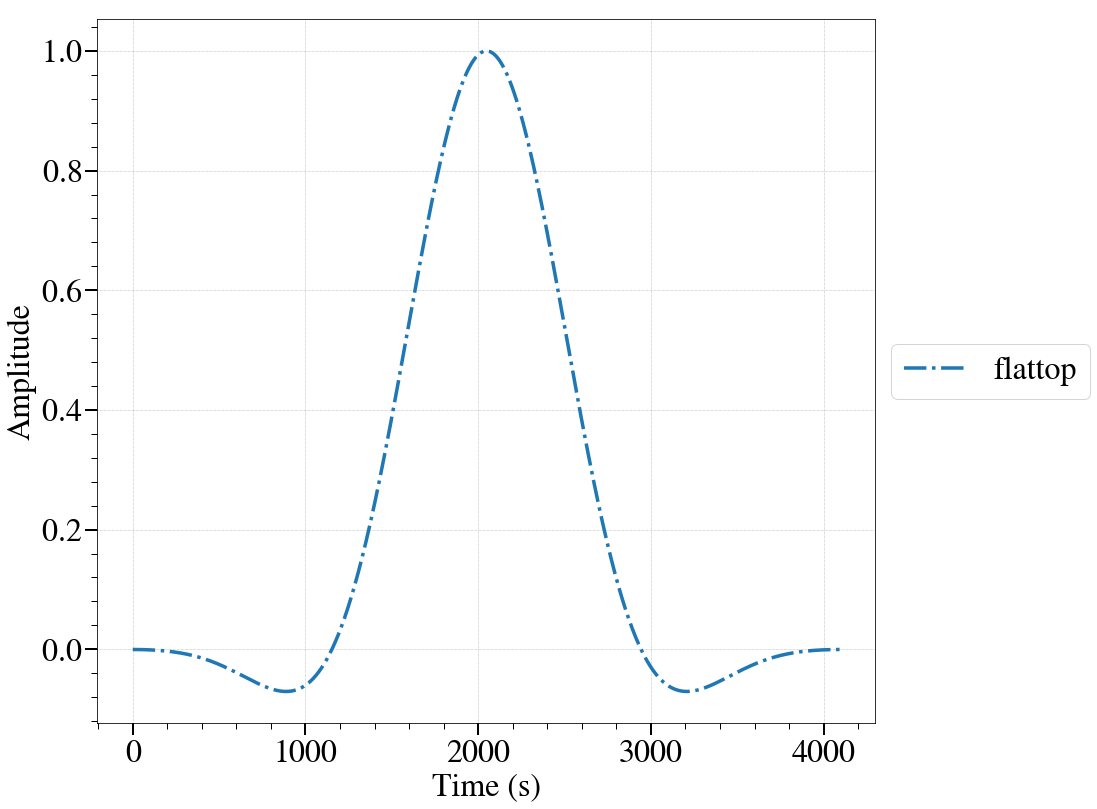

<function __main__.plot_windows(windows, Nx=4096)>

In [1]:
%pylab inline
import matplotlib as mpl

from scipy import signal
from scipy.signal import get_window
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['font.size'] = 32
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['figure.figsize'] = (7.2,4.45)
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.labelsize'] = 32
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['mathtext.fontset'] = 'stix'      
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = 3.5
mpl.rcParams['xtick.labelsize'] = 32
mpl.rcParams['ytick.labelsize'] = 32
mpl.rcParams['legend.fontsize'] = 32
AVAILABLE_WINDOWS = ['boxcar', 'triang', 'blackman', 'hamming', 'hann', 'bartlett', 
                     'flattop', 'parzen', 'bohman', 'blackmanharris', 'nuttall',
                     'barthann']

def setup_axis(ax):
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.tick_params(direction='out', length=12, 
                   width=2, 
                   grid_alpha=0.5)
    ax.tick_params(direction='out', which='minor', length=6, 
                   width=1, 
                   grid_alpha=0.5)
    ax.grid(True)
    
def plot_windows(windows, Nx=4096):
    # boxcar, triang, blackman, hamming, hann, bartlett, 
    # flattop, parzen, bohman, blackmanharris, nuttall, 
    # barthann, 
    
    # kaiser (needs beta), 
    # gaussian (needs standard deviation), 
    # general_gaussian (needs power, width), 
    # slepian (needs width), 
    # dpss (needs normalized half-bandwidth), 
    # chebwin (needs attenuation), 
    # exponential (needs decay scale), 
    # tukey (needs taper fraction)
    if not isinstance(windows, tuple):
        windows = [windows]
    fig, ax = plt.subplots(figsize=(16, 12))
    for window in windows:
        gwindow = get_window(window, Nx=Nx)
        ax.plot(gwindow, label=window, linestyle='-.')

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    setup_axis(ax)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    fig.tight_layout()

    
select = widgets.SelectMultiple(
    options=AVAILABLE_WINDOWS,
    value=('flattop',),
    disabled=False,
)
interact(plot_windows, windows=select, Nx=(1, 4097))


In [2]:
colors = ['#a6cee3',
          '#1f78b4',
          '#b2df8a',
          '#33a02c',
          '#fb9a99',
          '#e31a1c',
          '#fdbf6f',
          '#ff7f00',
          '#cab2d6',
          '#6a3d9a',
          '#ffff99']
def plot_freq_mix(freq1, freq2, windows):
    if not isinstance(windows, tuple):
        windows = [windows]
    fig = plt.figure(figsize=(25, 20))
    ax = plt.subplot(211)
    t = np.arange(0, 60, step=1)
    s = np.sin( 2*t*np.pi*freq1) + np.sin( 2*t*np.pi*freq2)
    

    setup_axis(ax)
    ax.plot(t, s)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax = plt.subplot(212)
    for color, window in zip(colors, windows):
        n = 4096
        w = np.fft.rfft(s * get_window(window, 60), n=n)
        freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
        ax.plot(freqs, 20*np.log10(np.abs(w)), label=window, color=color)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=4, mode="expand", borderaxespad=0.)
    setup_axis(ax)
    ax.set_xlabel('Frequnecy (Hz)')
    ax.set_ylabel('decibels')

    fig.tight_layout()
interact(plot_freq_mix, 
         freq1=widgets.FloatSlider(min=0.1,max=30,step=0.01,value=0.33), 
         freq2=widgets.FloatSlider(min=0.1,max=30,step=0.01,value=0.33),
         windows=select,)


interactive(children=(FloatSlider(value=0.33, description='freq1', max=30.0, min=0.1, step=0.01), FloatSlider(…

<function __main__.plot_freq_mix(freq1, freq2, windows)>